# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [119]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

# Set the randomizer seed so results are the same each time.
np.random.seed(0)


In [120]:
import sklearn
sklearn.__version__

'0.24.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [121]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
#X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

import pandas as pd
data = pd.read_csv('https://datahub.io/machine-learning/mnist_784/r/mnist_784.csv')
data['class'] = data['class'].astype(str)
X = data.iloc[:,:-1].to_numpy()
Y = data.iloc[:,-1].to_numpy()

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]


data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

<Figure size 7840x7840 with 0 Axes>

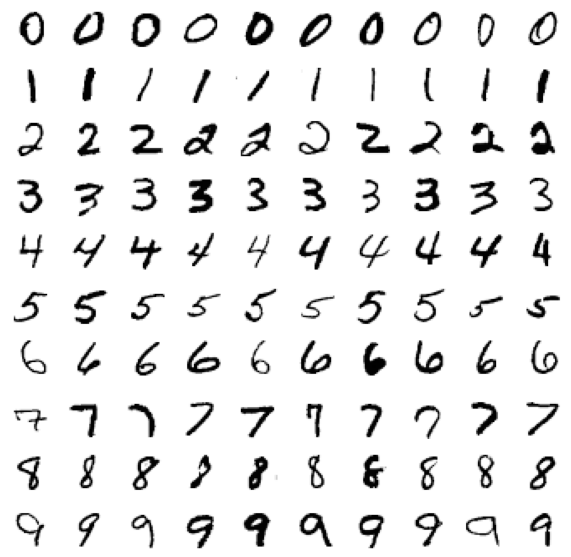

In [122]:
def P1(num_examples=10):

### STUDENT START ###

    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(num_examples,len(np.unique(Y))), dpi=X.shape[1])

    digits = np.unique(Y)
    num = 10
    dim = int(np.sqrt(X.shape[1]))

    fig, axs = plt.subplots(len(digits), num, figsize=(10,10))

    for i,d in enumerate(digits):
        for j in range(num):
            axs[i,j].imshow(X[Y==d][j].reshape((dim,dim)))
            axs[i,j].axis('off')            


### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [123]:
def P2(k_values):

### STUDENT START ###
 
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(mini_train_data, mini_train_labels)
        dev_pred = model.predict(dev_data)
        score = model.score(dev_data, dev_labels) 
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))

        if k == 1:
            labels = np.unique(Y).astype(int).astype('S')
            print ('\n Precission, recall, F1 for each digit:')
            print (classification_report(dev_labels, dev_pred))        
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k=1, accuracy=88.40%

 Precission, recall, F1 for each digit:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k=3, accuracy=87.60%
k=5, accuracy=88.20%
k=7, accuracy=87.70%
k=9, accuracy=87.50%


ANSWER:For k=1, the most difficult digit to predict is '8' because '8' has the lowest F1-score, and F1-score reflects both pricission and recall.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [124]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    elapsed_times = []

    model = KNeighborsClassifier(n_neighbors=1)
    for size in train_sizes:
        start = time.time()
        train_data, train_labels = X[:size], Y[:size]
        model.fit(train_data, train_labels)
        accuracies.append(model.score(dev_data, dev_labels))
        end = time.time()
        elapsed_times.append(end - start)
    print(''.join(' When training size = {0:5d} :  model accuracy = {1:.3f} ; Elapsed time = {2:4.2f}\n'.format(x,y,z) for x,y,z in 
                  zip(train_sizes, accuracies, elapsed_times)))

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

 When training size =   100 :  model accuracy = 0.702 ; Elapsed time = 0.03
 When training size =   200 :  model accuracy = 0.791 ; Elapsed time = 0.03
 When training size =   400 :  model accuracy = 0.811 ; Elapsed time = 0.04
 When training size =   800 :  model accuracy = 0.866 ; Elapsed time = 0.04
 When training size =  1600 :  model accuracy = 0.905 ; Elapsed time = 0.06
 When training size =  3200 :  model accuracy = 0.927 ; Elapsed time = 0.10
 When training size =  6400 :  model accuracy = 0.939 ; Elapsed time = 0.14
 When training size = 12800 :  model accuracy = 0.952 ; Elapsed time = 0.27
 When training size = 25600 :  model accuracy = 0.963 ; Elapsed time = 0.66



### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

Original model
R-squared of original: 0.42
accuracy of training set size = 60000 is 1.236
accuracy of training set size = 120000 is 1.637
accuracy of training set size = 1000000 is 7.522
-------------------
Level-log model
R-squared of log transform: 0.91
accuracy of training set size = 60000 is 1.669
accuracy of training set size = 120000 is 1.740
accuracy of training set size = 1000000 is 1.956
-------------------
Sqrt model
R-squared of sqrt transform: 0.63
accuracy of training set size = 60000 is 1.131
accuracy of training set size = 120000 is 1.271
accuracy of training set size = 1000000 is 2.172
-------------------
Loglog model
R-squared of log-log transform: 0.96
accuracy of training set size = 60000 is 1.012
accuracy of training set size = 120000 is 1.031
accuracy of training set size = 1000000 is 1.085
-------------------


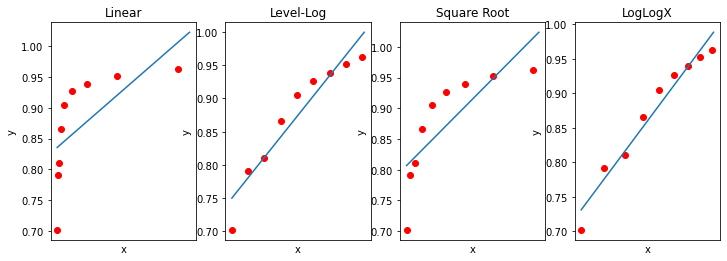

In [125]:
def P4():

### STUDENT START ###
    
    test_sizes = [60000, 120000 , 1000000]     
    labels =  [ Y[:60000], Y[:120000] , Y[:1000000] ] 

    # First we traspose the features (training set size) and labels (accuracy)
    X = np.array(train_sizes)[:,np.newaxis]
    y = np.array(accuracies)[:,np.newaxis]
    model = LinearRegression()
    model.fit(X, y)  
    print('Original model')
    print('R-squared of original: %.2f' % r2_score(y, model.predict(X)))
    for size in test_sizes:
        acc = model.predict([[size]])    
        print('accuracy of training set size =', size, 'is %.3f' % acc)
    print('-------------------')

    plt.figure(figsize=(12, 4))
    ax = plt.subplot(1, 4, 1)
    plt.setp(ax, xticks=())
    x = np.linspace(X.min(), 28000, 100)[:,np.newaxis]
    plt.plot(x, model.predict(x))
    plt.scatter(X, y, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Linear')
 
    logX = np.log10(X)
    model.fit(logX, y)
    print('Level-log model')
    print('R-squared of log transform: %.2f' % r2_score(y, model.predict(logX)))
    for size in test_sizes:
        acc = model.predict(np.log([[size]]))    
        print('accuracy of training set size =', size, 'is %.3f' % acc)
    print('-------------------')  
    ax = plt.subplot(1, 4, 2)
    plt.setp(ax, xticks=())
    x = np.linspace(np.log10(X.min()), np.log10(28000), 100)[:,np.newaxis]
    plt.plot(x, model.predict(x))
    plt.scatter(np.log10(X), y, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Level-Log')
 
    sqrtX = np.sqrt(X)
    model.fit(sqrtX, y)
    print('Sqrt model')
    print('R-squared of sqrt transform: %.2f' % r2_score(y, model.predict(sqrtX))) 
    for size in test_sizes:
        acc = model.predict(np.sqrt([[size]]))    
        print('accuracy of training set size =', size, 'is %.3f' % acc)
    print('-------------------')  
    ax = plt.subplot(1, 4, 3)
    plt.setp(ax, xticks=())
    x = np.linspace(np.sqrt(X.min()), np.sqrt(28000), 100)[:,np.newaxis]
    plt.plot(x, model.predict(x))
    plt.scatter(np.sqrt(X), y, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Square Root')
 
    loglogX = np.log10(np.log10(X))
    model.fit(loglogX, y)
    print('Loglog model')
    print('R-squared of log-log transform: %.2f' % r2_score(y, model.predict(loglogX)))
    for size in test_sizes:
        acc = model.predict(np.log10(np.log10([[size]])))    
        print('accuracy of training set size =', size, 'is %.3f' % acc)
    print('-------------------')  
    ax = plt.subplot(1, 4, 4)
    plt.setp(ax, xticks=())
    x = np.linspace(np.log10(np.log10(X.min())), np.log10(np.log10(28000)), 100)[:,np.newaxis]
    plt.plot(x, model.predict(x))
    plt.scatter(np.log10(np.log10(X)), y, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('LogLogX')

### STUDENT END ###

P4()

ANSWER:

What's wrong with using linear regression is the accuracies by the linear models sometimes are greater than 1.  This is not reasonable. Also the linear models did not fit well the data. 

In detail, my observation to the comparison of the accuracies of each model by using R^2 are: 
loglogX model (0.86)   > level-log model (0.80)  > Squre-root model (0.48) > origin model (0.32) 

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]

the model confuse most often:
There are 11 cases in which the digit 4 is confused with the digit 9.
the digits are as the follows:



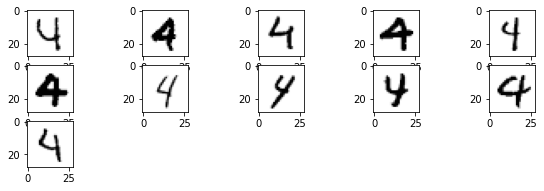

In [126]:
def P5():

### STUDENT START ###

    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    Y = model.predict(dev_data)
    confusion = confusion_matrix(dev_labels, Y)
    print(confusion)
    
    np.fill_diagonal(confusion, 0)
    row, col = np.unravel_index(confusion.argmax(), confusion.shape)
    max = confusion.max()
    
    print('\n===========================================================')
    print('the model confuse most often:')
    print('There are {0:2d} cases in which the digit {1:d} is confused with the digit {2:d}.'.format(max,row, col))
    print('the digits are as the follows:')
    print('============================================================\n')
    
    confused_digit = []*max
    j = 0 
    for i in range(1000): 
        if (dev_labels[i] == str(row)) & (Y[i] == str(col) ):
            confused_digit.append(dev_data[i])
            j = j+1
               
    dim = int(np.sqrt(X.shape[1]))
    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(10,10))
    for k in range(len(confused_digit)):
        digit = confused_digit[k]
        plt.subplot(10, 5, k+1)
        plt.imshow(digit.reshape((dim,dim)))
            
    
### STUDENT END ###

P5()

ANSWER: 

The model confuse most often: there are 11 cases in which the digit 4 is confused with the digit 9.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

Accuracy for unprep dev data with unprep train data: 0.884

Accuracy for unprep dev data with prep train data:   0.906
Accuracy for prep dev data with unprep train data:   0.868
Accuracy for prep dev data with prep train data:     0.900


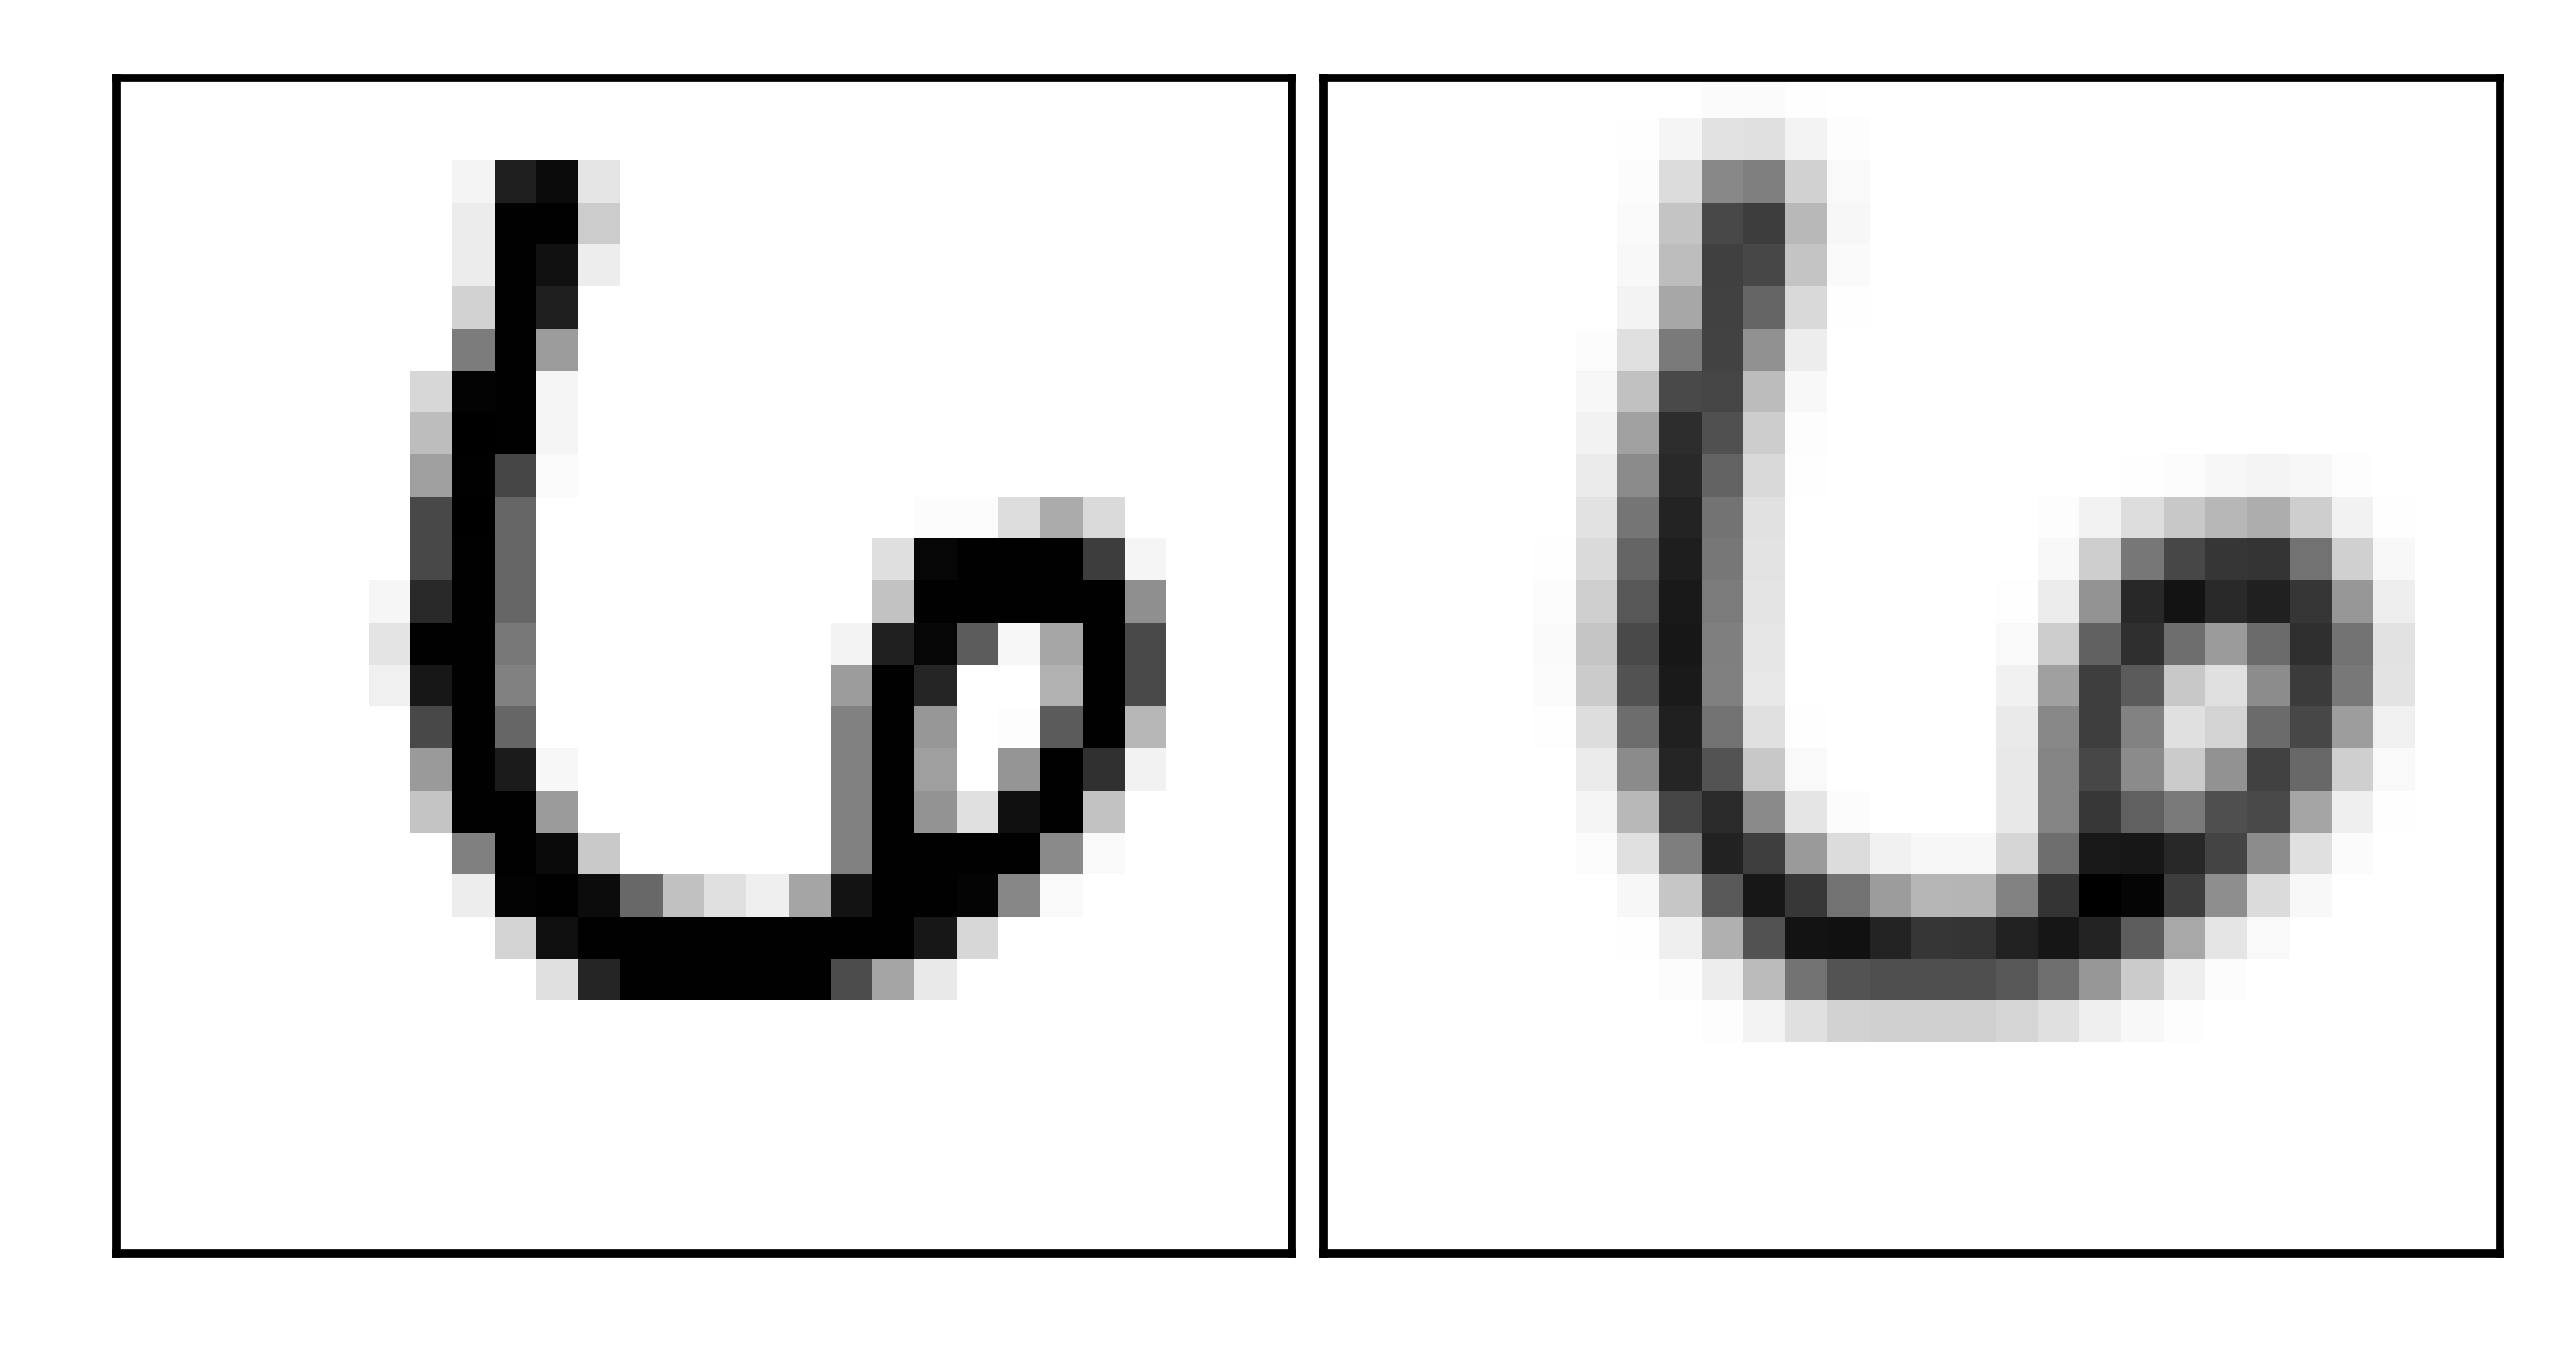

In [10]:
def P6():
    
### STUDENT START ###
    def gaussian_blur(image, sigma):
        dim = int(np.sqrt(len(image)))
        
        blurred_image = np.copy(image)
        
        coordinates =np.zeros((dim,dim,2))        
        for i in range(coordinates.shape[0]):
            for j in range(coordinates.shape[1]):
                coordinates[i,j,0]= i
                coordinates[i,j,1]= j
        
        find_neighbors = KNeighborsClassifier(n_neighbors=9)
        find_neighbors.fit(np.concatenate(coordinates), np.zeros(dim*dim))
        
        for row in range(dim):
            for col in range(dim):
                neighbors = find_neighbors.kneighbors([[row, col]])
                weights = np.exp(-(np.square(neighbors[0])) / (2*np.square(sigma)))/(2*np.pi*np.square(sigma))
                weights = weights/weights.sum()
                blurred_image[row*dim+col] = np.average(image[neighbors[1]], weights=weights.tolist())
        return blurred_image
    
    # An example of how a random digit looks like after blurring
    dim = int(np.sqrt(X.shape[1]))
    random_image = X[np.random.choice(X.shape[0])]
    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(4, 2), dpi=X.shape[1])
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(wspace=0, hspace=0)
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.imshow(random_image.reshape(dim,dim))
    plt.subplot(1, 2, 2)
    plt.subplots_adjust(wspace=0, hspace=0)
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.imshow(gaussian_blur(random_image,1).reshape(dim,dim))

    model = KNeighborsClassifier(n_neighbors=1)
    blurred_train_data = np.apply_along_axis(gaussian_blur, 1, mini_train_data, 1)   
    blurred_dev_data = np.apply_along_axis(gaussian_blur, 1, dev_data, 1)
    
    # Analyze the 4 possible cases
    
    model.fit(mini_train_data, mini_train_labels)
    print ('Accuracy for unprep dev data with unprep train data: {0:5.3f}'.format(model.score(dev_data, dev_labels))) 
                                                                                                                  
    model.fit(blurred_train_data, mini_train_labels)
    print ('Accuracy for unprep dev data with prep train data: {0:7.3f}'.format(model.score(dev_data, dev_labels)))
                                                                                                              
    model.fit(mini_train_data, mini_train_labels)
    print ('Accuracy for prep dev data with unprep train data: {0:7.3f}'.format(model.score(blurred_dev_data, dev_labels)))
                                                                                                              
    model.fit(blurred_train_data, mini_train_labels)
    print ('Accuracy for prep dev data with prep train data: {0:9.3f}'.format(model.score(blurred_dev_data, dev_labels)))
                                                                                                     

### STUDENT END ###

P6()

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

Accuracy of Binomial NB: 0.831
Accuracy of Multinomial NB: 0.815


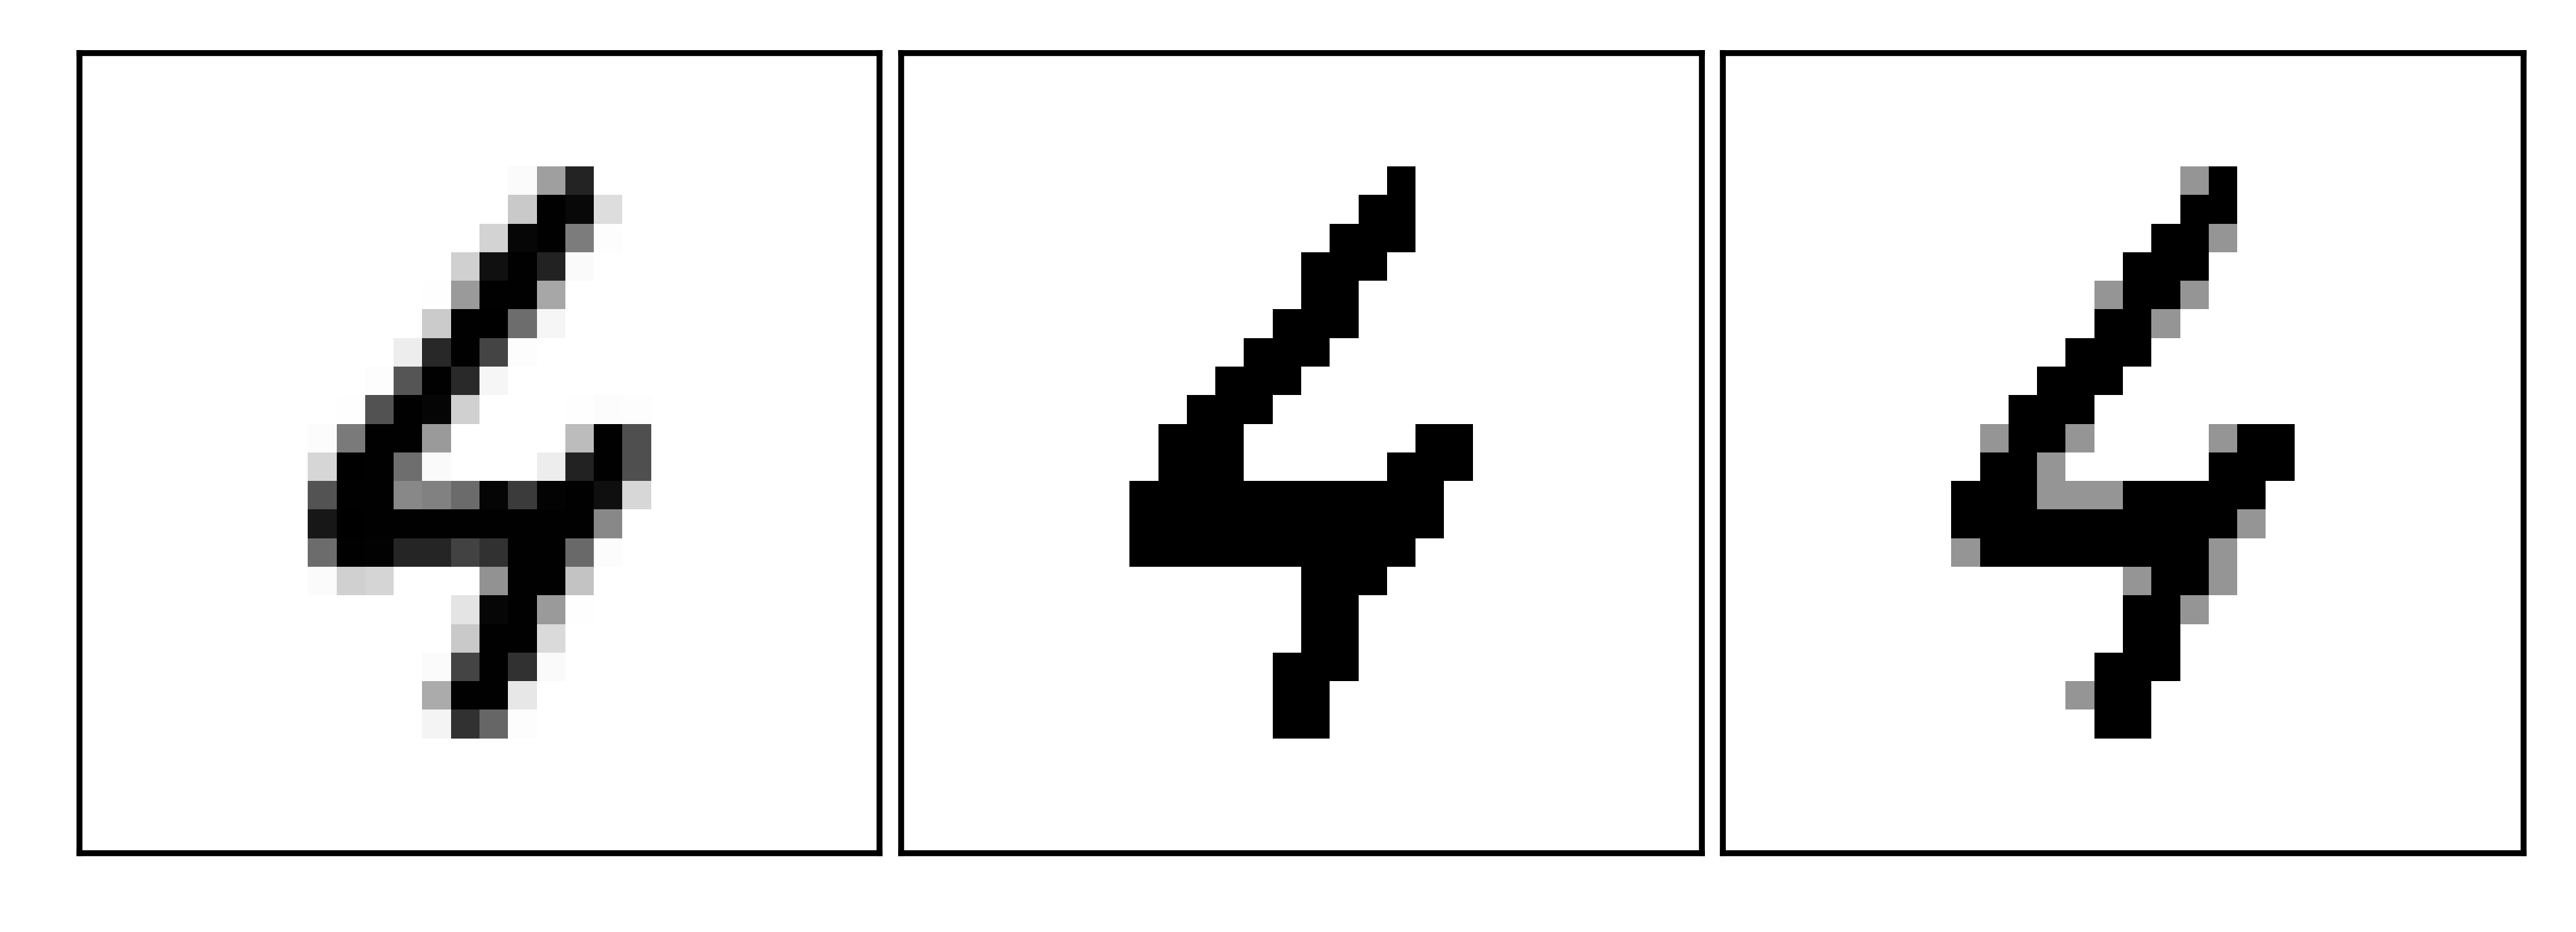

In [127]:
def P7():

### STUDENT START ###

    # Binomial NB
    BinomialNB_model = BernoulliNB(binarize=0.333)
    # I use the argument given by the function
    # To binarize the datasets we could also use a simpler version of the transformation used below, in Multinomial NB
    BinomialNB_model.fit(mini_train_data, mini_train_labels)
    print ('Accuracy of Binomial NB: {0:.3f}'.format(BinomialNB_model.score(dev_data, dev_labels)))
    
    # Multinomial NB
    MultinomialNB_model = MultinomialNB()
    trinarized_train_data = np.where((mini_train_data > 0.333) & (mini_train_data < 0.667), 1, 
                                     np.where(mini_train_data > 0.333, 2, 0))
    trinarized_dev_data = np.where((dev_data > 0.333) & (dev_data < 0.667), 1, np.where(dev_data > 0.333, 2, 0))
    MultinomialNB_model.fit(trinarized_train_data, mini_train_labels)
    print ('Accuracy of Multinomial NB: {0:.3f}'.format(MultinomialNB_model.score(trinarized_dev_data, dev_labels)))
    
    # An example of how a random digit looks like after binarizing or trinarizing its pixels
    dim = int(np.sqrt(X.shape[1]))
    random_image = X[np.random.choice(X.shape[0])]
    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(6,2), dpi=X.shape[1])
    plt.subplot(1, 3, 1)
    plt.subplots_adjust(wspace=0, hspace=0)
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.imshow(random_image.reshape(dim,dim))
    plt.subplot(1, 3, 2)
    plt.subplots_adjust(wspace=0, hspace=0)
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    binarized_random_image = np.where(random_image < 0.5, 0, 1)
    plt.imshow(binarized_random_image.reshape(dim,dim))
    # The image becomes much more defined
    plt.subplot(1, 3, 3)
    plt.subplots_adjust(wspace=0, hspace=0)
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    trinarized_random_image = np.where((random_image > 0.333) & (random_image < 0.667), 0.5, 
                                       np.where(random_image > 0.333, 1, 0))
    plt.imshow(trinarized_random_image.reshape(dim,dim))
    # Still not as blurred as the original    
    
### STUDENT END ###

P7()

ANSWER:The multi-class version does *not* improve the results. If we change the thresholds (e.g., to 0.25 and 0.75 instead of 0.33 and 0.66) the accuracy of tha version is even worse (below 0.810). Binarizing is another way of filtering noise, so (with less categories) we make the image more precise and defined, hence increasing *P(feature|label)*, and also *P(label|feature)*. Considering more categories would decrease the accuracy to even lower values.

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [128]:
def P8(alphas):

### STUDENT START ###

    clf = BernoulliNB()
    nb = GridSearchCV(clf, alphas, cv=3, scoring='accuracy')
    nb.fit(mini_train_data, mini_train_labels)
    
    cv_results = zip(nb.cv_results_['mean_test_score'], 
                     nb.cv_results_['std_test_score'],
                     nb.cv_results_['params'])
    
    for mean, std, param in cv_results:
        print( 'with %r:  ''mean %f (std %f)' % (param, mean, std) )

    return nb

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

with {'alpha': 1e-10}:  mean 0.803981 (std 0.015008)
with {'alpha': 0.0001}:  mean 0.817974 (std 0.019258)
with {'alpha': 0.001}:  mean 0.820971 (std 0.021626)
with {'alpha': 0.01}:  mean 0.820977 (std 0.017602)
with {'alpha': 0.1}:  mean 0.820980 (std 0.016153)
with {'alpha': 0.5}:  mean 0.818984 (std 0.012555)
with {'alpha': 1.0}:  mean 0.816985 (std 0.010924)
with {'alpha': 2.0}:  mean 0.806981 (std 0.014180)
with {'alpha': 10.0}:  mean 0.771955 (std 0.032690)

Best alpha =  {'alpha': 0.1}


ANSWER:The best value for alpha is 0.01. Accuracy seems to follow a parabola (at least from alpha = 0.0001 on) that reaches its maximum (about 0.82) when alpha = 0.01. But for alpha = 0 is very low (<0.1): this seems normal, since alpha = 0 implies that we don't trust at all p(x|y), and only consider p(x).

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

Accuracy of Gaussian NB: 0.593
Best approximate value of sigma: 0.10
Accuracy of new GaussianNB = 0.822


GaussianNB()

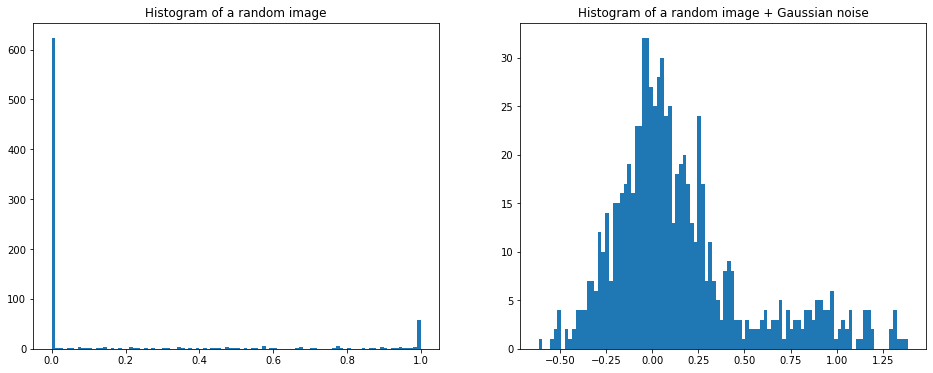

In [129]:
def P9():

### STUDENT END ###

    GaussianNB_model = GaussianNB()
    # Fit the model with the mini training set
    GaussianNB_model.fit(mini_train_data, mini_train_labels)
    # Report accuracy for the dev set
    print ('Accuracy of Gaussian NB: {0:.3f}'.format(GaussianNB_model.score(dev_data,dev_labels)))  
 
    random_image = X[np.random.choice(X.shape[0])]
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    fig = plt.hist(random_image, 100)
    plt.title('Histogram of a random image')
    plt.subplot(1, 2, 2)
    fig = plt.hist(random_image + np.random.normal(0, 0.2, random_image.shape), 100)
    plt.title('Histogram of a random image + Gaussian noise')

    sigmas = np.arange(0.05, 1.05, 0.05)
    accuracies = np.zeros(sigmas.shape)
    for i in range(sigmas.shape[0]):
        new_train_data = mini_train_data + np.random.normal(0,sigmas[i], mini_train_data.shape)
        new_dev_data = dev_data + np.random.normal(0,sigmas[i], mini_train_data.shape)
        GaussianNB_model.fit(new_train_data, mini_train_labels)
        accuracies[i] = GaussianNB_model.score(new_dev_data, dev_labels)
    sigma=sigmas[accuracies.argmax()]
    print ('Best approximate value of sigma: {0:.2f}'.format(sigma))
    # Most common values are still (around) 0 and 1 in the 2nd histogram
    
    new_train_data = mini_train_data + np.random.normal(0,sigma,mini_train_data.shape)
    new_dev_data = dev_data + np.random.normal(0,sigma,mini_train_data.shape)
    GaussianNB_model.fit(new_train_data, mini_train_labels)
    print ('Accuracy of new GaussianNB = {0}'.format(GaussianNB_model.score(new_dev_data, dev_labels)))
    return GaussianNB_model

### STUDENT END ###

P9()

ANSWER:The Gaussian NB model expects the features to be normally distributed, but that's not the case here: they're almost binary (0 in most of the pixels, or 1): that's why the Binomial NB model worked better. By adding gaussian noise (of mean zero and the standard deviation that maximizes the accuracy on the dev set), the features of the preprocessed images follow a distribution closer to normality, and the model works as well as the Binomila NB one.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

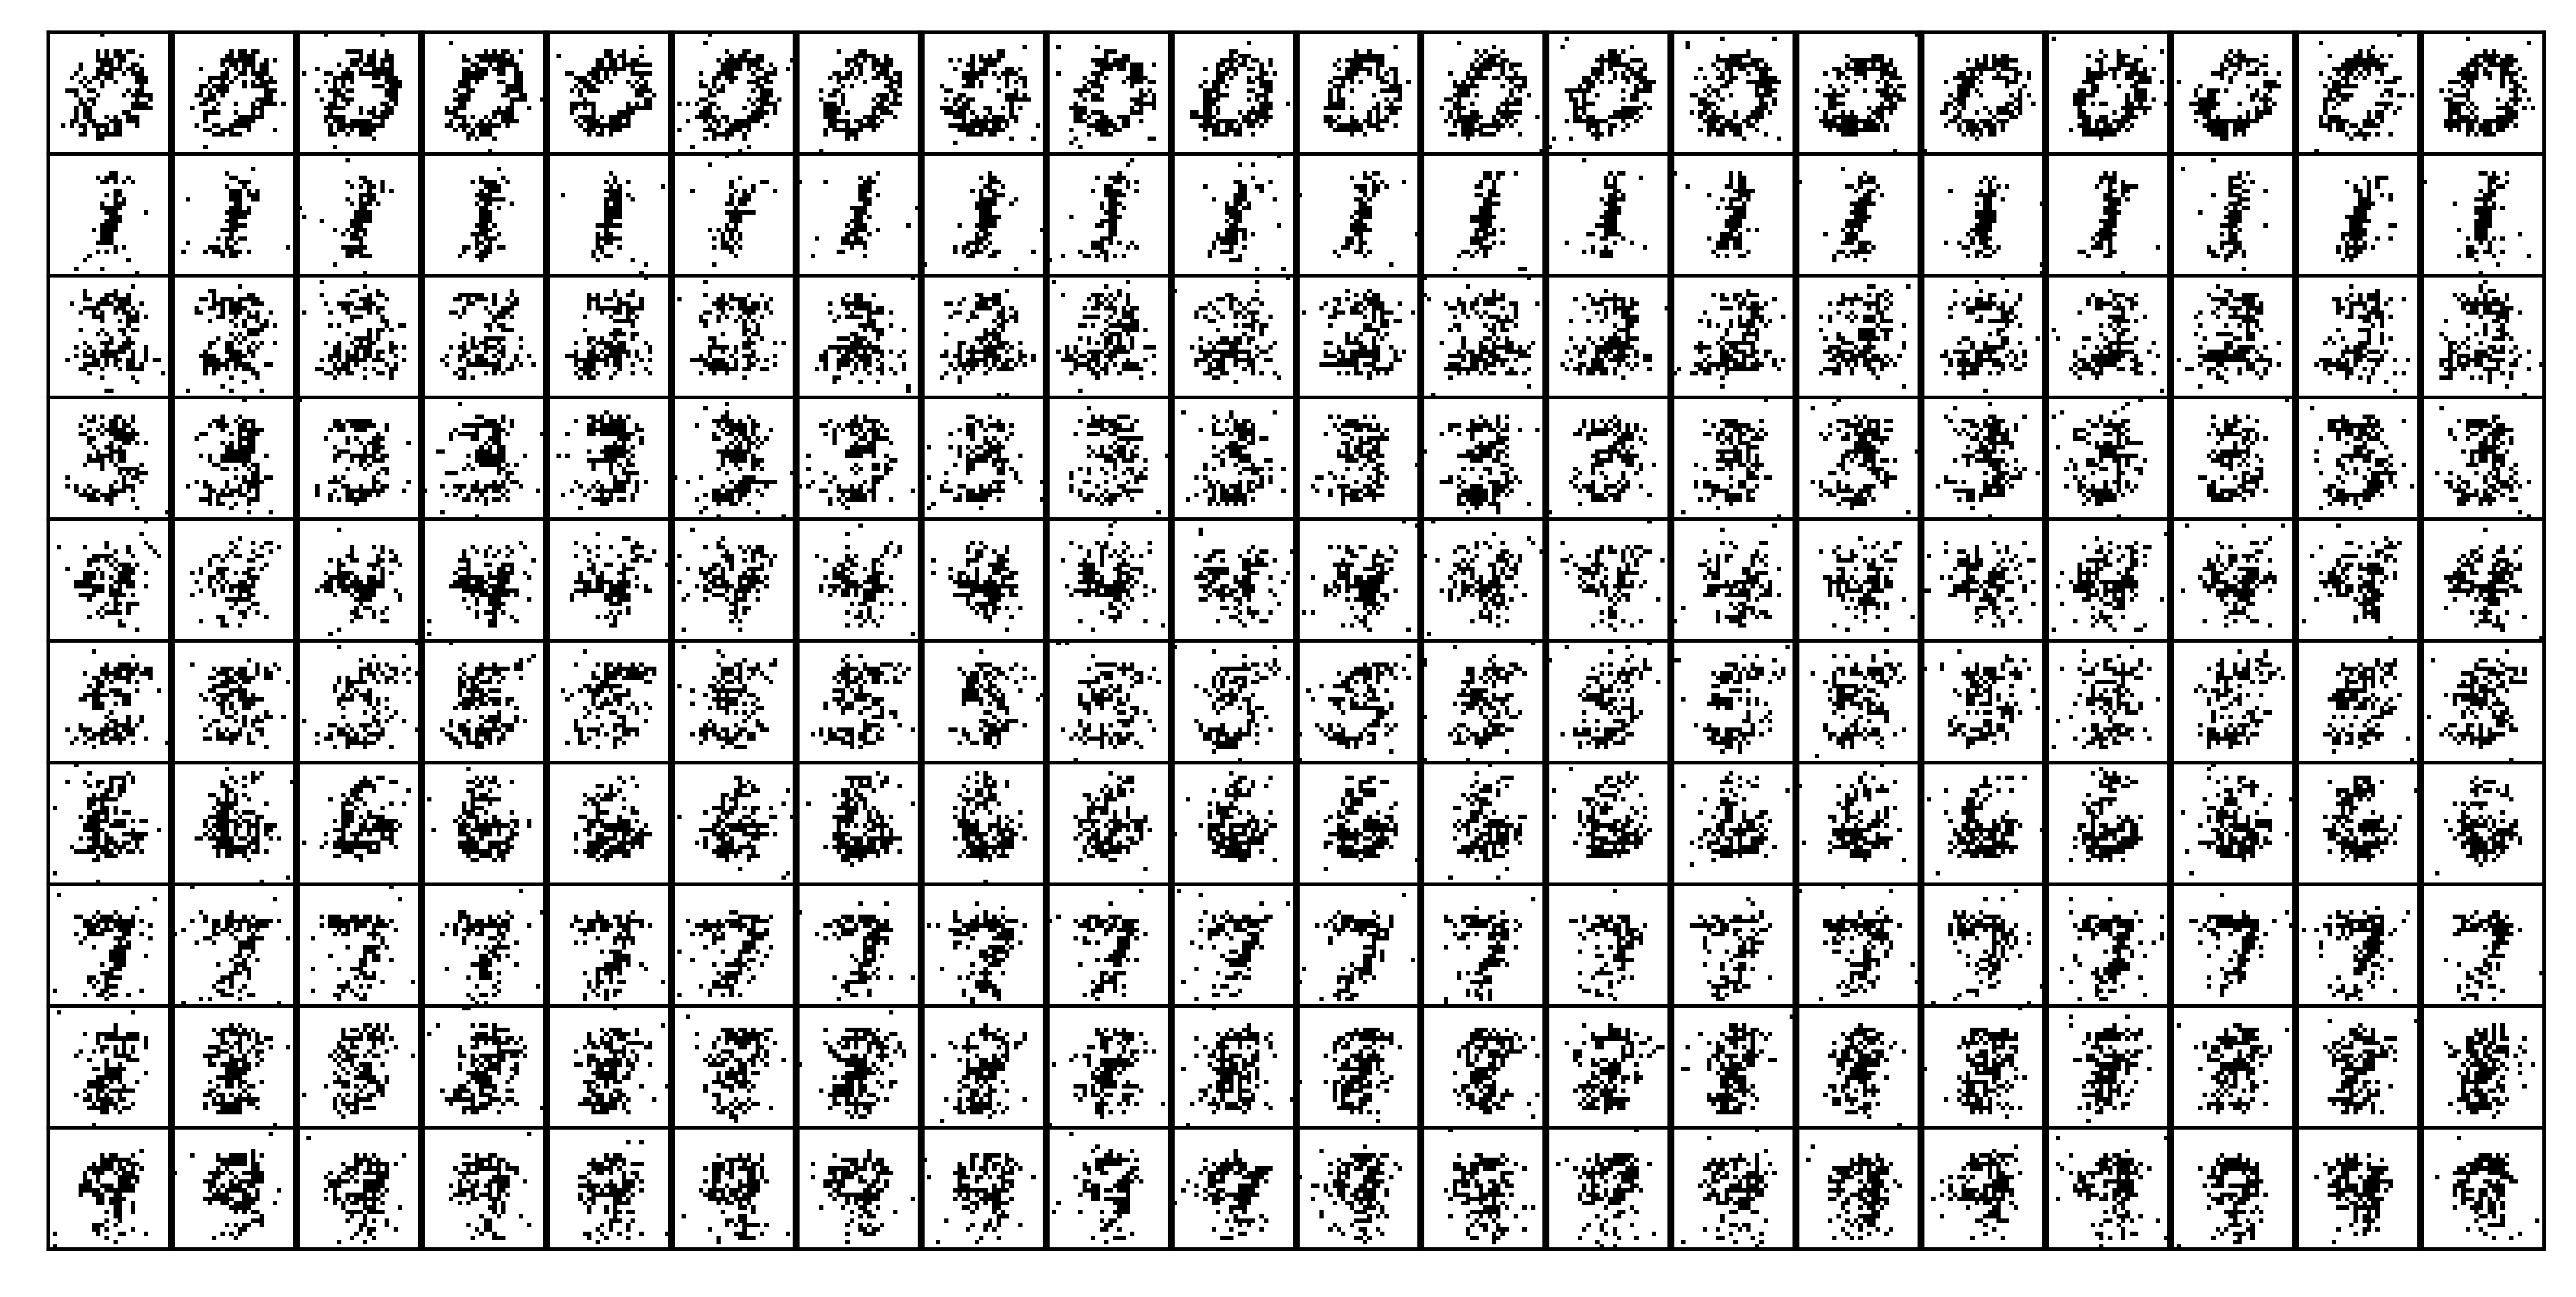

In [131]:
def P10(num_examples):

### STUDENT START ###

    BinomialNB_model = BernoulliNB(binarize=0.333)
    BinomialNB_model.fit(mini_train_data, mini_train_labels)
    probs = np.exp(BinomialNB_model.feature_log_prob_)
    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(10, 5), dpi=X.shape[1])
    # For each digit (from 0 to 9)
    for i in range(len(np.unique(Y))):
        for j in range(num_examples):
            # Create subplot
                # (from 1 to "num_digits"*"num_examples" of each digit)
            example = np.where(probs[i,:]>np.random.rand(X.shape[1]),
                               1,0)
            plt.subplot(len(np.unique(Y)), num_examples, 
                        i * num_examples + j + 1)
            plt.subplots_adjust(wspace=0, hspace=0)
            # Hide tickmarks and scale
            ax = plt.gca()
            # ax.set_axis_off() # Also hide axes (frame)
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            # Plot the corresponding digit
            dim = int(np.sqrt(X.shape[1]))
            digit = example.reshape((dim,dim))
            plt.imshow(digit)
            
### STUDENT END ###

P10(20)

ANSWER:The generated digits look much fuzzier than the real ones, but overall they're similar to what they should look like, giving an idea of the general pattern, i.e., which pixles should be on in each digit.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  33    accuracy = 0.273
p(pred) is 0.9000000000000 to 0.9990000000000    total =  94    accuracy = 0.574
p(pred) is 0.9990000000000 to 0.9999900000000    total =  58    accuracy = 0.448
p(pred) is 0.9999900000000 to 0.9999999000000    total =  66    accuracy = 0.697
p(pred) is 0.9999999000000 to 0.9999999990000    total =  71    accuracy = 0.845
p(pred) is 0.9999999990000 to 0.9999999999900    total =  50    accuracy = 0.840
p(pred) is 0.9999999999900 to 0.9999999999999    total =  61    accuracy = 0.836
p(pred) is 0.9999999999999 to 1.0000000000000    total = 567    accuracy = 0.958


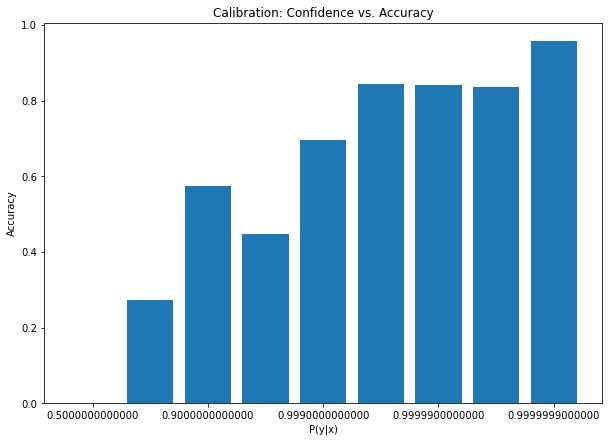

In [132]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    # Create a Binomial NB model
    BinomialNB_model = BernoulliNB(alpha=nb.best_params_['alpha'], binarize=0.333)
    # Fit it with the mini training set
    BinomialNB_model.fit(mini_train_data, mini_train_labels)
    # Predict labels and probabilities of dev set
    dev_predicted_labels = BinomialNB_model.predict(dev_data)
    dev_predicted_probs = BinomialNB_model.predict_proba(dev_data)
    # Define some aux variables: buckets_copy and acc
    buckets_copy = list(buckets)
    # Each bucket ranges from the prior value to the current one: first prior value is 0 
    buckets_copy.insert(0, 0.)
    # Accuracy for each bucket (to display it)
    acc = [0.]*len(buckets)
    # For every bucket (-> depends on input to function)
    for i in range(1,len(buckets)+1):
        # Goes from 1 to len(buckets) because we'll use buckets_copy to compare probabilities
        label_into_bucket = np.zeros(dev_predicted_labels.shape[0])
        count_correct = 0
        count_total = 0
        # For every prediction (for every item in dev set -> 1000)
        for j in range(dev_predicted_probs.shape[0]):
            # Search the maximum posterior probability (it may correspond to the correct label or not)
            prob = dev_predicted_probs[j, dev_predicted_probs[j].argmax()]
            # If that maximum posterior is inside the current bucket (threshold under study) we take it into account
            label_into_bucket[j] = np.where((prob <= buckets_copy[i]) & (prob > buckets_copy[i-1]), 1, 0)
            # If posterior was within the current bucket for that item
            if label_into_bucket[j] == 1:
                # increase count of total
                count_total +=1
                # If prediction was correct
                if dev_predicted_labels[j] == dev_labels[j]:
                    # increase count of correct
                    count_correct += 1
        # Count total and correct cases for each particular item
        # Make at least one of them a float to allow non-integer division
        correct[i-1] = float(count_correct)
        total[i-1] = float(count_total)
        # Update acc(uracy) (used to display it)
        if (total[i-1] > 0): acc[i-1] = correct[i-1] / total[i-1]
    
    # Display Posterior vs. Accuracy
    buck = ["{:.13f}".format(i) for i in buckets_copy]
    plt.figure(figsize=(10,7))
    fig = plt.bar(range(len(buckets)), acc)
    plt.title('Calibration: Confidence vs. Accuracy')
    plt.xlabel('P(y|x)')
    plt.ylabel('Accuracy')
    ax = plt.gca()
    ax.set_xticklabels(buck)             
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

ANSWER: Our classifier is not perfectly calibrated, as depicted in the graph above: posterior and accuracy are not always positively correlated (see 2nd and 8th buckets: P=0.9 and P=0.9999999999999). I.e., higher confidence does not always correspond with higher accuracy, so we cannot always infer something about the accuracy of the classifier given the posterior.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [133]:
def P12():

### STUDENT START ###

    def sum_pixel(image):
        dim = int(np.sqrt(len(image)))
        ima = np.copy(image)
        for row in range(dim):
            subima = ima[row*dim : row*dim+dim]
            sumrow = np.sum(subima) 
            ima =np.append(ima, sumrow)  
        for col in range(dim):
            subima = ima[col*dim : col*dim+dim]
            sumcol = np.sum(subima) 
            ima =np.append(ima, sumcol)     
        blockdim = 7
        for row in range(blockdim):
            for col in range(blockdim):
                subblk = ima[row*col:row*col+blockdim]
                subblkcol = ima[col*blockdim:col*blockdim+blockdim]
                sumblk = np.sum(subblk) 
                ima =np.append(ima, sumblk)      
        return ima

    sumpix_train_data = np.apply_along_axis(sum_pixel, 1, mini_train_data)   

    print(sumpix_train_data.shape)
    
    model = BernoulliNB(binarize=0.333)
    model.fit(mini_train_data, mini_train_labels)
    score = model.score(mini_train_data, mini_train_labels)
    print ('Accuracy of new GaussianNB = {0}'.format(score))
    
    model.fit(sumpix_train_data, mini_train_labels)
    score = model.score(sumpix_train_data, mini_train_labels)
    print ('Accuracy of new GaussianNB = {0}'.format(score))
  
    
### STUDENT END ###

P12()

(1000, 889)
Accuracy of new GaussianNB = 0.857
Accuracy of new GaussianNB = 0.857
